In [1]:
import os
import pandas as pd
from tqdm import tqdm
# from meshparty import meshwork
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns

from scipy import stats
from scipy.optimize import curve_fit

def linear_function(x, a, b):
    return a * x + b
    

In [2]:
cell_metadata = pd.read_csv('../../data/MICrONS_metadata_240928.csv', sep=',')
cell_metadata['root_id'] = cell_metadata['root_id'].astype(str)
root_list = list(cell_metadata['root_id'].unique())
cell_metadata[['neuron_name', 'root_id', 'exc_inh', 'cell_type_1', 'cell_type_2', 'soma_x', 'soma_y', 'soma_z']]

,neuron_name,root_id,exc_inh,cell_type_1,cell_type_2,soma_x,soma_y,soma_z
0,864691134784325628_137038,864691134784325628,excitatory_neuron,L6tall-c,6P-IT,432.448,1053.696,880.36
1,864691134884743162_304043,864691134884743162,excitatory_neuron,L6short-a,6P-IT,753.408,859.968,636.44
2,864691134884747514_765421,864691134884747514,excitatory_neuron,L6short-b,6P-IT,1573.056,950.016,885.84
3,864691134884754426_126781,864691134884754426,excitatory_neuron,L6tall-a,6P-CT,443.392,899.072,781.76
4,864691134884756730_339142,864691134884756730,excitatory_neuron,L6tall-a,6P-IT,837.632,847.680,679.24
...,...,...,...,...,...,...,...,...
64332,864691137198227521_607224,864691137198227521,excitatory_neuron,L2a,23P,1392.896,372.928,881.68
64333,864691137198230337_325702,864691137198230337,excitatory_neuron,L2c,23P,831.488,474.560,694.88
64334,864691137198230849_556194,864691137198230849,excitatory_neuron,L4a,4P,1272.192,580.928,730.76
64335,864691137198234177_325542,864691137198234177,excitatory_neuron,L2c,23P,802.240,491.136,688.60


In [3]:
soma_ct = cell_metadata['cell_type_1'].value_counts()
soma_ct

cell_type_1
L4b          6856
L6tall-a     5572
L6tall-c     5442
L3b          5314
L4a          4781
L2c          3804
L3a          3585
L2b          3354
L6short-a    3120
L2a          2902
L4c          2562
L5b          2339
DTC          2333
PTC          2320
L6short-b    2256
L5a          1962
L6tall-b     1676
L5ET         1651
ITC          1220
L5NP          796
STC           492
Name: count, dtype: int64

In [4]:
wide_df2_ = pd.read_csv('../../data/micron_visp_synapse_branch_level.csv', 
                               sep=',', index_col=0)

wide_df2_

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
DTC,1241299,1939528,2325088,1723318,913792,400976,160538,80603,43606,34900,...,762,946,570,486,463,498,361,79,33,0
ITC,275799,365080,509904,533422,440423,288084,163879,89463,40229,21521,...,0,0,0,0,0,0,0,0,0,0
L2a,1085819,2178383,3097057,2472727,1439989,875661,591709,427223,257501,141638,...,385,50,63,129,295,0,0,0,0,0
L2b,896146,1702761,2139265,1537329,887813,580056,392393,242805,128908,59082,...,762,670,66,144,268,0,0,0,0,0
L2c,1222668,2449818,3324308,2381659,1309588,869371,680952,515238,324375,181243,...,0,0,0,0,0,0,0,0,0,0
L3a,1318033,2816041,4170970,3032271,1512318,885053,707946,585914,442125,260170,...,0,0,0,0,0,0,0,0,0,0
L3b,1850072,3647990,4292000,2571266,1161940,682633,484661,351756,219792,113241,...,0,0,0,0,0,0,0,0,0,0
L4a,1663239,3114127,3531371,2108284,843553,319839,131981,61306,29025,10797,...,13,0,0,0,0,0,0,0,0,0
L4b,1917211,3131292,2832371,1488955,631185,268616,125294,55319,25464,9795,...,0,0,0,0,0,0,0,0,0,0
L4c,831370,1355664,1396188,879328,434448,196986,78163,30777,11293,4228,...,0,0,0,0,0,0,0,0,0,0


In [5]:
for i in (wide_df2_.index):
    wide_df2_.loc[i, :] = wide_df2_.loc[i, :] / soma_ct[i]
    
wide_df2 = wide_df2_.copy()

wide_df2

C:\Users\yishui\AppData\Local\Temp\ipykernel_39616\3553648503.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '532.0612944706387' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  wide_df2_.loc[i, :] = wide_df2_.loc[i, :] / soma_ct[i]
C:\Users\yishui\AppData\Local\Temp\ipykernel_39616\3553648503.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '831.3450492927561' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  wide_df2_.loc[i, :] = wide_df2_.loc[i, :] / soma_ct[i]
C:\Users\yishui\AppData\Local\Temp\ipykernel_39616\3553648503.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '996.6086583797685' has dtype incompatible with int64, please explicitly cast to a c

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
DTC,532.061294,831.345049,996.608658,738.670381,391.681097,171.871410,68.811830,34.549078,18.690956,14.959280,...,0.326618,0.405486,0.244321,0.208315,0.198457,0.213459,0.154736,0.033862,0.014145,0.000000
ITC,226.064754,299.245902,417.954098,437.231148,361.002459,236.134426,134.327049,73.330328,32.974590,17.640164,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L2a,374.162302,750.648863,1067.214680,852.076844,496.205720,301.743970,203.896968,147.216747,88.732254,48.807030,...,0.132667,0.017229,0.021709,0.044452,0.101654,0.000000,0.000000,0.000000,0.000000,0.000000
L2b,267.187239,507.680680,637.824985,458.356887,264.702743,172.944544,116.992546,72.392665,38.434109,17.615385,...,0.227191,0.199761,0.019678,0.042934,0.079905,0.000000,0.000000,0.000000,0.000000,0.000000
L2c,321.416404,644.011041,873.898002,626.093323,344.266036,228.541272,179.009464,135.446372,85.272082,47.645373,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L3a,367.652162,785.506555,1163.450488,845.821757,421.846025,246.876709,197.474477,163.434868,123.326360,72.571827,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L3b,348.150546,686.486639,807.677832,483.866391,218.656379,128.459353,91.204554,66.194204,41.360933,21.309936,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L4a,347.885170,651.354738,738.626020,440.971345,176.438611,66.897929,27.605313,12.822840,6.070906,2.258314,...,0.002719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L4b,279.639877,456.722870,413.122958,217.175467,92.063156,39.179697,18.275088,8.068699,3.714119,1.428676,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L4c,324.500390,529.142857,544.960187,343.219360,169.573770,76.887588,30.508587,12.012881,4.407884,1.650273,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
for i in wide_df2.columns:
    if i not in list(wide_df2.columns):
        wide_df2[i] = 0

wide_df2 = wide_df2[[str(i) for i in list(range(1, 11))]]
wide_df2 = (wide_df2.T / wide_df2.sum(axis=1)).T

wide_df2

,1,2,3,4,5,6,7,8,9,10
DTC,0.140044,0.218818,0.262317,0.194425,0.103094,0.045238,0.018112,0.009094,0.004920,0.003937
ITC,0.101107,0.133837,0.186928,0.195550,0.161457,0.105610,0.060077,0.032797,0.014748,0.007889
L2a,0.086398,0.173332,0.246430,0.196752,0.114578,0.069675,0.047082,0.033994,0.020489,0.011270
L2b,0.104610,0.198768,0.249723,0.179457,0.103637,0.067712,0.045805,0.028343,0.015048,0.006897
L2c,0.092213,0.184763,0.250717,0.179623,0.098768,0.065567,0.051357,0.038859,0.024464,0.013669
L3a,0.083787,0.179014,0.265146,0.192760,0.096137,0.056262,0.045004,0.037246,0.028106,0.016539
L3b,0.120327,0.237262,0.279148,0.167233,0.075572,0.044398,0.031522,0.022878,0.014295,0.007365
L4a,0.140791,0.263607,0.298926,0.178464,0.071406,0.027074,0.011172,0.005189,0.002457,0.000914
L4b,0.182844,0.298631,0.270123,0.142001,0.060196,0.025618,0.011949,0.005276,0.002428,0.000934
L4c,0.159314,0.259783,0.267549,0.168504,0.083252,0.037748,0.014978,0.005898,0.002164,0.000810


In [8]:
tmp_dict1 = {'L2/3': ['L2a', 'L2b', 'L2c', 'L3a', 'L3b'],

'L4': ['L4a', 'L4b', 'L4c'],

'L5': ['L5ET', 'L5NP', 'L5a', 'L5b'],

'L6': ['L6short-a', 'L6short-b', 'L6tall-a',
       'L6tall-b', 'L6tall-c']}

tmp_dict11 = {}
for k,v in tmp_dict1.items():
    for vi in v:
        tmp_dict11[vi] = k

tmp_dict2 = {'L2/3': ['VISp2/3'],

'L4': ['VISp4'],

'L5': ['VISp5'],

'L6': ['VISp6a', 'VISp6b']}

tmp_dict22 = {}
for k,v in tmp_dict2.items():
    for vi in v:
        tmp_dict22[vi] = k

In [9]:
tmp_list1 = []
for i in list(tmp_dict1.values()):
    tmp_list1 = tmp_list1+i

print(tmp_list1)

['L2a', 'L2b', 'L2c', 'L3a', 'L3b', 'L4a', 'L4b', 'L4c', 'L5ET', 'L5NP', 'L5a', 'L5b', 'L6short-a', 'L6short-b', 'L6tall-a', 'L6tall-b', 'L6tall-c']


In [10]:
wide_df3 = wide_df2_.loc[tmp_list1, [str(i) for i in list(range(1, 16))]]

wide_df3['layer'] = [tmp_dict11[i] for i in wide_df3.index]
wide_df3 = wide_df3.groupby('layer').sum() 
wide_df3 = (wide_df3.T / wide_df3.sum(axis=1)).T
wide_df3.columns = [str(i) for i in wide_df3.columns]
wide_df3

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
layer,,,,,,,,,,,,,,,
L2/3,0.094231,0.189428,0.255431,0.183359,0.097999,0.060548,0.044269,0.032823,0.021171,0.011674,0.005396,0.002190,0.000885,0.000406,0.000189
L4,0.157568,0.270973,0.280819,0.165734,0.072505,0.030282,0.012643,0.005446,0.002349,0.000883,0.000409,0.000187,0.000106,0.000075,0.000021
L5,0.117513,0.211594,0.241325,0.158052,0.083799,0.047074,0.031140,0.022742,0.018065,0.014812,0.013186,0.011881,0.010296,0.009514,0.009006
L6,0.142678,0.256708,0.243374,0.139514,0.078388,0.050623,0.033193,0.022353,0.014594,0.008636,0.004956,0.002649,0.001370,0.000632,0.000332


In [11]:
pac_wide_df = pd.read_csv('../figure1/ppss_from_pac_visp_wide_df.csv', 
                          sep=',', index_col=0)
pac_wide_df = pac_wide_df.loc[['VISp2/3', 'VISp4', 'VISp5', 'VISp6a', 'VISp6b'], [str(i) for i in (range(1,16))]]
pac_wide_df['layer'] = [tmp_dict22[i] for i in pac_wide_df.index]

pac_wide_df2 = pac_wide_df.groupby('layer').sum() 
pac_wide_df2 = (pac_wide_df2.T / pac_wide_df2.sum(axis=1)).T

pac_wide_df2

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
layer,,,,,,,,,,,,,,,
L2/3,0.019972,0.054677,0.127638,0.153680,0.197728,0.152949,0.127487,0.084698,0.038861,0.023044,0.012139,0.003526,0.003375,0.000227,0.000000
L4,0.036092,0.063018,0.109888,0.137312,0.172906,0.176051,0.127378,0.082387,0.042920,0.026542,0.015074,0.005216,0.003490,0.001342,0.000384
L5,0.029746,0.089083,0.156463,0.192288,0.174395,0.131181,0.094470,0.063493,0.039020,0.018779,0.005233,0.004156,0.001116,0.000577,0.000000
L6,0.025829,0.095986,0.192670,0.191099,0.181152,0.143805,0.094066,0.056894,0.005410,0.004887,0.005934,0.002269,0.000000,0.000000,0.000000


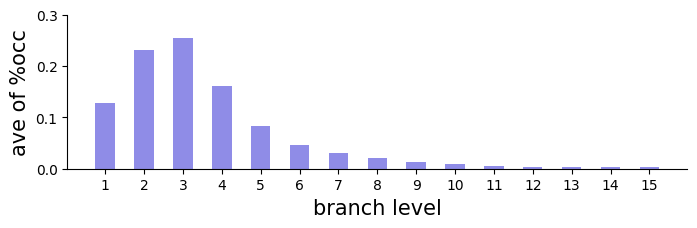

In [19]:
f,ax = plt.subplots(1,1,figsize=(8,2))
plt.bar([str(i) for i in list(wide_df3.columns)], 
        list(wide_df3.sum(axis=0) / len(wide_df3.index)),
        width=0.5, color='xkcd:perrywinkle'
       )
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim([0, 0.3])

plt.xlabel('branch level', fontsize=15)
plt.ylabel('ave of %occ', fontsize=15)
plt.savefig('./micron_dist.svg', bbox_inches='tight')
plt.show()


In [20]:
stats.pearsonr(list(pac_wide_df2.sum(axis=0) / len(pac_wide_df2.index)), list(wide_df3.sum(axis=0) / len(wide_df3.index)))

PearsonRResult(statistic=0.5685850159727716, pvalue=0.02698775302627435)

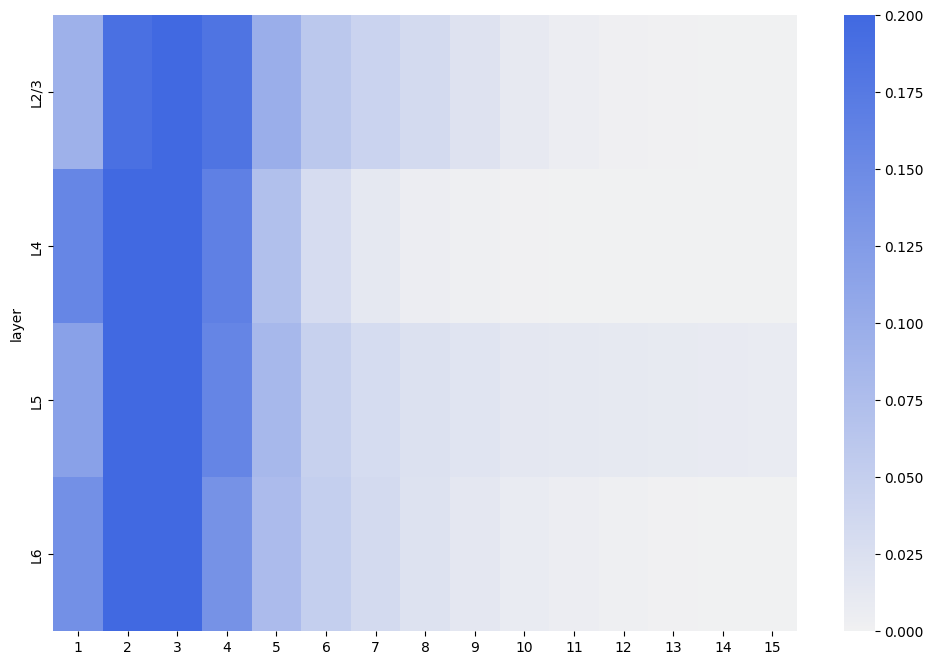

In [21]:
f,ax = plt.subplots(1,1,figsize=(12,8))
sns.heatmap((wide_df3), 
            vmin=0.00, 
            vmax=0.20,
            cmap=sns.color_palette("light:royalblue", as_cmap=True),
           )
# plt.xticks(np.arange(10, 80, 10)-0.5, [10, 20, 30, 40, 50, 60, 70])
plt.savefig('./micron_den_level_vis.svg', bbox_inches='tight')

In [15]:
tmp_list = []

for i in wide_df3.index:
    for j in wide_df3.columns:
        tmp_list.append([pac_wide_df2.loc[i, j], wide_df3.loc[i,(j)]])

cmp_micron = pd.DataFrame({'micron': [i[1] for i in tmp_list],
                          'ppss': [i[0] for i in tmp_list]
                         })

cmp_micron

,micron,ppss
0,0.094231,0.019972
1,0.189428,0.054677
2,0.255431,0.127638
3,0.183359,0.153680
4,0.097999,0.197728
5,0.060548,0.152949
6,0.044269,0.127487
7,0.032823,0.084698
8,0.021171,0.038861
9,0.011674,0.023044


In [16]:
print(stats.pearsonr(cmp_micron['micron'], cmp_micron['ppss']))

PearsonRResult(statistic=0.5428309999422187, pvalue=7.434281873501877e-06)


In [17]:
x = cmp_micron['micron']
y = cmp_micron['ppss']

params, covariance = curve_fit(linear_function, x, y)
a, b = params
x_fit = np.linspace(min(x), max(x), 100)
y_fit = linear_function(x_fit, a, b)

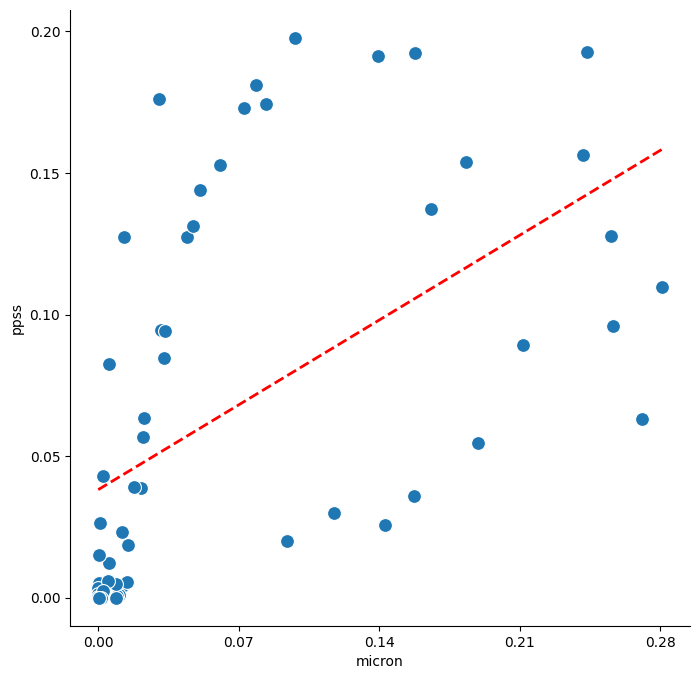

In [18]:
f,ax = plt.subplots(1,1,figsize=(8,8))
sns.scatterplot(data=cmp_micron, x='micron', 
                y='ppss',
                s = 100
               )

plt.plot(x_fit, y_fit, color='red', 
         linewidth=2, linestyle='--',
         label='Fitted Curve')

plt.xticks([0, 0.07, 0.14, 0.21, 0.28])
plt.yticks([0, 0.05, 0.10, 0.15, 0.20])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.savefig('./scatterplot_cmp_micron.jpg', dpi=800, bbox_inches='tight')
plt.savefig('./cmp_micron.svg', bbox_inches='tight')
plt.show()